In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import math

In [59]:
new_chi_data = pd.read_csv('transformed_data.csv', index_col=0)
new_chi_data.columns

Index(['bus', 'rail_boardings', 'total_rides', 'is_sat', 'is_holi',
       'avg_precip', 'temp_mid', 'temp_rng', 'temp_bs', 'hum_mid', 'hum_rng',
       'wind_mid', 'wind_rng', 'pres_mid', 'pres_rng'],
      dtype='object')

Text(0, 0.5, 'Predictions')

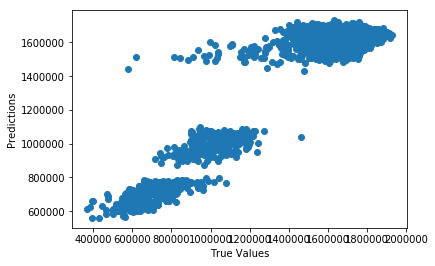

In [60]:
day_of_week = 7

y = new_chi_data['total_rides']#[day_of_week::7]
X = new_chi_data[['is_sat','is_holi','avg_precip','temp_mid','temp_rng',
                  'temp_bs','hum_mid','hum_rng','wind_mid','wind_rng','pres_mid','pres_rng']]#[day_of_week::7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)


lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')


In [61]:
model.coef_

array([-6.22546093e+05, -9.14603682e+05, -5.08676540e+04,  1.97127362e+03,
       -6.43342813e+01,  3.57578719e+03, -1.02935012e+03,  1.06426818e+03,
       -3.78692338e+03,  1.57246561e+02, -4.05904193e+04,  8.05495633e+03])

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'Training score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')
print(f'RMSE: {rmse}')

Training score: 0.8810399588837741
Test score: 0.8916919020523236
RMSE: 128853.70357171299


In [69]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'Training score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')
print(f'RMSE: {rmse}')

Training score: 0.8810362685478694
Test score: 0.8917150450464175
RMSE: 128839.93627326528


In [70]:
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'Training score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')
print(f'RMSE: {rmse}')

Training score: 0.8810399578641996
Test score: 0.8916927763551109
RMSE: 128853.18349342857
